In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

In [143]:
results_df = pd.read_csv("Datasets/results.csv")
picks_df = pd.read_csv("Datasets/picks.csv")
players_df= pd.read_csv("Datasets/players.csv")
economy_df = pd.read_csv("Datasets/economy.csv")

c:\python3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [144]:
print(len(results_df))
results_df.head()

45773


,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2


In [145]:
print(len(picks_df))
picks_df.head()

16035


,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,1,2340454,5151,3,123412,Vertigo,Train,0.0,Nuke,Overpass,0.0,Dust2,Inferno,Mirage
1,2020-03-18,Rugratz,Bad News Bears,0,2340453,5151,3,123412,Dust2,Nuke,0.0,Mirage,Train,0.0,Vertigo,Inferno,Overpass
2,2020-03-18,New England Whalers,Station7,0,2340461,5243,1,121212,Mirage,Dust2,Vertigo,Nuke,Train,Overpass,0.0,0.0,Inferno
3,2020-03-17,Complexity,forZe,1,2340279,5226,3,123412,Inferno,Nuke,0.0,Overpass,Vertigo,0.0,Dust2,Train,Mirage
4,2020-03-17,Singularity,Endpoint,0,2340456,5247,3,123412,Train,Mirage,0.0,Nuke,Inferno,0.0,Overpass,Vertigo,Dust2


In [146]:
print(len(players_df))
players_df.head()

383317


,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,...,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,...,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,...,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,...,0.0,67.2,66.7,0.97,1.0,9.0,-8.0,14.8,45.5,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,...,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99


In [147]:
print(len(economy_df))
economy_df.head()

43234


,date,match_id,event_id,team_1,team_2,best_of,_map,t1_start,t2_start,1_t1,...,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
0,2020-03-01,2339402,4901,G2,Natus Vincere,5,Nuke,t,ct,4350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-01,2339402,4901,G2,Natus Vincere,5,Dust2,ct,t,3900.0,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN
2,2020-03-01,2339402,4901,G2,Natus Vincere,5,Mirage,t,ct,4150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Dust2,t,ct,4150.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Nuke,ct,t,4200.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
minimum_rank = 30

results_df = results_df[(results_df.rank_1<minimum_rank)&(results_df.rank_2<minimum_rank)]
picks_df     = picks_df[picks_df.match_id.isin(results_df.match_id.unique())]
economy_df   = economy_df[economy_df.match_id.isin(results_df.match_id.unique())]
players_df   = players_df[players_df.match_id.isin(results_df.match_id.unique())]

results_df.reset_index(drop='True',inplace=True)
picks_df.reset_index(drop='True',inplace=True)
players_df.reset_index(drop='True',inplace=True)
economy_df.reset_index(drop='True',inplace=True)

In [149]:
print(len(results_df))
results_df.head()

9017


,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-17,fnatic,BIG,Mirage,12,16,2,1,9,6,3,10,5226,2340397,5,18,1,2,2
1,2020-03-17,fnatic,BIG,Overpass,16,7,1,2,4,4,12,3,5226,2340397,5,18,1,2,2
2,2020-03-17,Natus Vincere,North,Nuke,10,16,2,1,7,8,3,8,5226,2340396,1,23,0,2,2
3,2020-03-17,Natus Vincere,North,Dust2,10,16,2,1,5,10,5,6,5226,2340396,1,23,0,2,2
4,2020-03-17,forZe,Complexity,Train,9,16,2,2,3,7,6,9,5226,2340279,24,17,2,1,1


In [150]:
results_df.describe()

,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
count,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9.017000e+03,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,13.321171,13.046468,1.484640,1.508151,6.642231,6.14395,6.286126,6.529555,3210.812909,2.317498e+06,12.364090,13.734834,5.663192,5.491516,1.482089
std,4.453096,4.630173,0.499792,0.499961,3.236292,3.14954,3.170751,3.249571,921.286635,1.248273e+04,7.917454,8.065071,6.399365,6.357349,0.499707
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1040.000000,2.299001e+06,1.000000,1.000000,0.000000,0.000000,1.000000
25%,10.000000,10.000000,1.000000,1.000000,4.000000,4.00000,4.000000,4.000000,2395.000000,2.305877e+06,5.000000,7.000000,1.000000,1.000000,1.000000
50%,16.000000,16.000000,1.000000,2.000000,7.000000,6.00000,6.000000,7.000000,3072.000000,2.316477e+06,11.000000,13.000000,2.000000,2.000000,1.000000
75%,16.000000,16.000000,2.000000,2.000000,9.000000,8.00000,9.000000,9.000000,3954.000000,2.328422e+06,19.000000,20.000000,12.000000,11.000000,2.000000
max,38.000000,41.000000,2.000000,2.000000,15.000000,16.00000,15.000000,15.000000,5242.000000,2.340397e+06,29.000000,29.000000,34.000000,34.000000,2.000000


In [151]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          9017 non-null   object
 1   team_1        9017 non-null   object
 2   team_2        9017 non-null   object
 3   _map          9017 non-null   object
 4   result_1      9017 non-null   int64 
 5   result_2      9017 non-null   int64 
 6   map_winner    9017 non-null   int64 
 7   starting_ct   9017 non-null   int64 
 8   ct_1          9017 non-null   int64 
 9   t_2           9017 non-null   int64 
 10  t_1           9017 non-null   int64 
 11  ct_2          9017 non-null   int64 
 12  event_id      9017 non-null   int64 
 13  match_id      9017 non-null   int64 
 14  rank_1        9017 non-null   int64 
 15  rank_2        9017 non-null   int64 
 16  map_wins_1    9017 non-null   int64 
 17  map_wins_2    9017 non-null   int64 
 18  match_winner  9017 non-null   int64 
dtypes: int

In [152]:
results_df.isnull().sum()

date            0
team_1          0
team_2          0
_map            0
result_1        0
result_2        0
map_winner      0
starting_ct     0
ct_1            0
t_2             0
t_1             0
ct_2            0
event_id        0
match_id        0
rank_1          0
rank_2          0
map_wins_1      0
map_wins_2      0
match_winner    0
dtype: int64

['BIG', 'BIG', 'North', 'North', 'forZe', 'forZe', 'BIG', 'forZe', 'Vitality', 'Vitality', 'NiP', 'NiP', 'Spirit', 'Spirit', 'Cloud9', 'Cloud9', 'Cloud9', 'GODSENT', 'GODSENT', 'GODSENT', 'Complexity', 'Complexity', 'NiP', 'NiP', 'Natus Vincere', 'Natus Vincere', 'Natus Vincere', 'G2', 'Spirit', 'Spirit', 'Spirit', 'G2', 'G2', 'Natus Vincere', 'Natus Vincere', 'fnatic', 'fnatic', 'Natus Vincere', 'Natus Vincere', 'mousesports', 'mousesports', '100 Thieves', '100 Thieves', '100 Thieves', 'Natus Vincere', 'Astralis', '100 Thieves', '100 Thieves', 'Natus Vincere', 'Natus Vincere', '100 Thieves', 'G2', 'Astralis', 'G2', '100 Thieves', '100 Thieves', 'MAD Lions', 'MAD Lions', 'MAD Lions', 'G2', 'Liquid', 'Natus Vincere', 'Liquid', 'FaZe', 'FaZe', 'FaZe', 'Liquid', 'G2', 'Natus Vincere', 'G2', 'Evil Geniuses', 'Evil Geniuses', 'Liquid', 'Liquid', 'NiP', 'Evil Geniuses', 'Astralis', 'NiP', 'fnatic', 'fnatic', 'fnatic', 'FaZe', 'FaZe', 'Astralis', 'Vitality', 'Astralis', 'Astralis', 'Vitality'

<AxesSubplot:xlabel='Teams'>

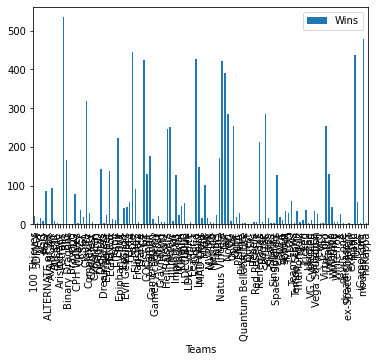

In [153]:
teams = []
wins = []

for index, row in results_df.iterrows():
    if row["match_winner"] == 1:
        teams.append(row["team_1"])
        wins.append(1)
    else:
        teams.append(row["team_2"])
        wins.append(1)

print(teams)
teams_dict = {"Teams": teams, "Wins":wins}
teams_and_wins = pd.DataFrame(teams_dict)
print(teams_and_wins.groupby("Teams").count())
team_wins = teams_and_wins.groupby("Teams").count()
team_wins.plot(kind="bar")

In [154]:
Features = ["result_1", "result_2", "map_winner", "starting_ct", "ct_1", "t_2", "t_1", "ct_2", "map_wins_1", "map_wins_2"]
X = results_df[Features]
y = results_df["match_winner"]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [156]:
models = [LogisticRegression(),LinearSVC(),KNeighborsClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]

model_names=['LogisticRegression','LinearSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree','GradientBoostingClassifier','GaussianNB']

acc = []

for model in range(len(models)):
    classifiers = models[model]
    classifiers.fit(X_train,y_train)
    pred = classifiers.predict(X_test)
    acc.append(accuracy_score(pred,y_test))

d={'Modelling Algo':model_names,'Accuracy':acc}
d

c:\python3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [1.0, 1.0, 0.9772727272727273, 1.0, 1.0, 1.0, 0.8863636363636364]}

In [157]:
acc_frame=pd.DataFrame(d)
acc_frame.sort_values(by = 'Accuracy', ascending = False)

,Modelling Algo,Accuracy
0,LogisticRegression,1.000000
1,LinearSVM,1.000000
3,RandomForestClassifier,1.000000
4,DecisionTree,1.000000
5,GradientBoostingClassifier,1.000000
2,KNearestNeighbors,0.977273
6,GaussianNB,0.886364


In [ ]:
test_data.describe()